---
## 2. CO2 배경대기농도, 대한민국 일평균, 대한민국 사계절 길이 데이터 시각화

#### 2-1. 라이브러리 호출

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

#### 2-2. 월평균 CO2 배경대기농도 데이터 호출 및 시각화

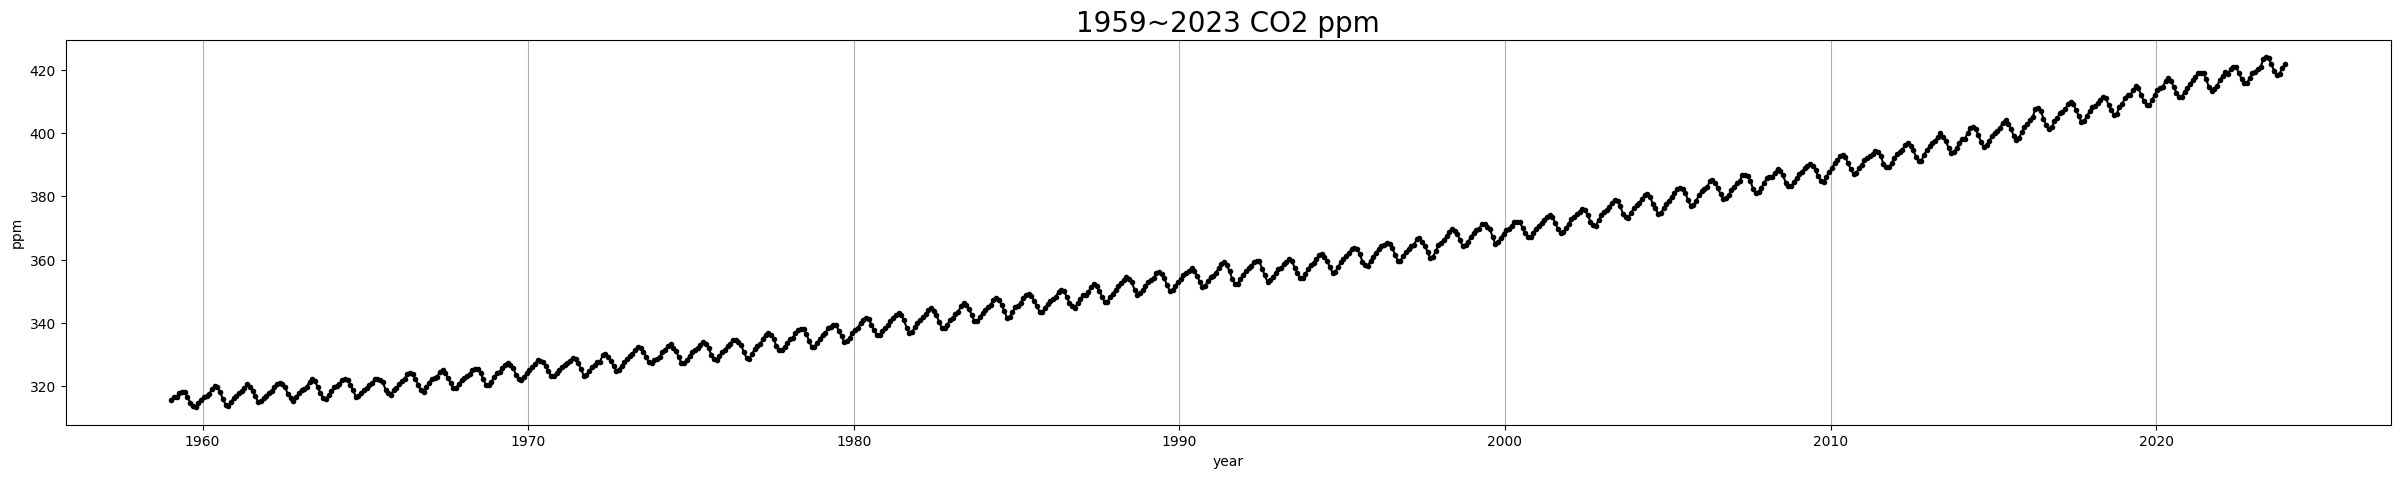

In [17]:
Hawaii_co2 = pd.read_csv('./DB/co2_mm_mlo.csv')
Hawaii_co2 = Hawaii_co2[Hawaii_co2['year'] >= 1959]
plt.figure(figsize=(30,5))
plt.plot(Hawaii_co2['decimal date'], Hawaii_co2['average'], marker='.', color='black')
plt.title('1959~2023 CO2 ppm', fontsize=20)
plt.grid(axis='x'); plt.xlabel('year'); plt.ylabel('ppm')
plt.show()

#### 2-3. 대한민국 일평균 기온 데이터 호출 및 시각화

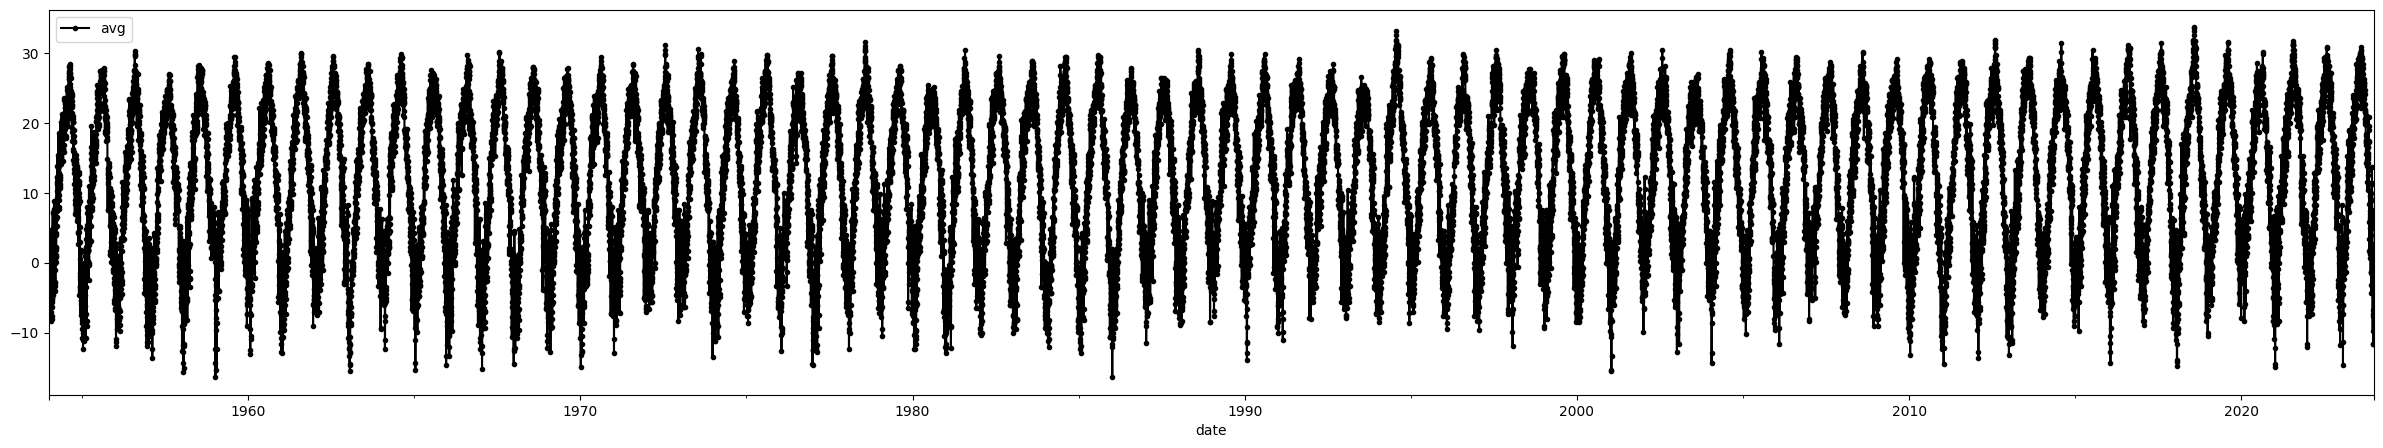

In [18]:
celsius = pd.read_csv('./DB/temperature_1954_2023.csv')
celsius['date'] = pd.to_datetime(celsius['date'], format='%Y-%m-%d')
celsius['year'] = celsius['date'].dt.year

celsius.plot(x='date', y='avg', figsize=(30,5), color='black', marker='.')
plt.show()

#### 2-4. 연도별 사계절 길이 데이터 호출 및 시각화

In [19]:
def calculate_length(start, end):
    start_date = datetime.strptime(start, "%Y-%m-%d")
    end_date = datetime.strptime(end, "%Y-%m-%d")
    return (end_date - start_date).days

In [20]:
season = pd.read_csv('./DB/season_2.csv')
season = season.dropna(axis=0)
season.reset_index(inplace=True)
season

,index,Unnamed: 0,date,spot,avg,low,high,year,MA,season
0,75,75,1959-03-17,108,7.1,0.2,14.3,1959,6.155556,spring
1,164,164,1959-06-14,108,19.9,18.0,22.8,1959,20.833333,summer
2,263,263,1959-09-21,108,18.8,14.6,23.9,1959,19.177778,fall
3,314,314,1959-11-11,108,5.0,-2.4,11.6,1959,4.300000,winter
4,428,428,1960-03-04,108,4.8,0.8,9.8,1960,6.577778,spring
...,...,...,...,...,...,...,...,...,...,...
255,23343,23343,2022-11-29,108,6.9,-1.6,15.0,2022,3.600000,winter
256,23437,23437,2023-03-03,108,4.6,-1.9,10.4,2023,6.455556,spring
257,23528,23528,2023-06-02,108,20.4,17.9,25.0,2023,22.122222,summer
258,23649,23649,2023-10-01,108,18.4,14.4,23.7,2023,18.955556,fall


In [21]:
year_list = []
spring_length = []
summer_length = []
fall_length = []
winter_length = []

for i in range(len(season)-1):
    day = calculate_length(season.loc[i, 'date'], season.loc[i+1, 'date'])
    
    if season.loc[i, 'year'] not in year_list:
        year_list.append(season.loc[i, 'year'])
    
    if season.loc[i, 'season'] == 'spring':
        spring_length.append(day)
        
    if season.loc[i, 'season'] == 'summer':
        summer_length.append(day)
        
    if season.loc[i, 'season'] == 'fall':
        fall_length.append(day)
        
    if season.loc[i, 'season'] == 'winter':
        winter_length.append(day)

winter_length.append(int(sum(winter_length[-3:])/len(winter_length[-3:])))

In [22]:
year_list = []
spring_length = []
summer_length = []
fall_length = []
winter_length = []

for year in season['year'].unique():
    # 해당 연도 데이터 추출
    year_data = season[season['year'] == year]
    
    # 각 계절의 시작 'index' 값 확인
    spring_start = year_data[year_data['season'] == 'spring']['index'].values[0]
    summer_start = year_data[year_data['season'] == 'summer']['index'].values[0]
    fall_start = year_data[year_data['season'] == 'fall']['index'].values[0]
    winter_start = year_data[year_data['season'] == 'winter']['index'].values[0]
    
    # 윤년 확인
    if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0):
        total_days = 366
    else:
        total_days = 365
    
    # 각 계절 길이 계산
    spring_len = summer_start - spring_start
    summer_len = fall_start - summer_start
    fall_len = winter_start - fall_start
    winter_len = total_days - (spring_len + summer_len + fall_len)
    
    # 연도 및 계절 길이 저장
    year_list.append(year)
    spring_length.append(spring_len)
    summer_length.append(summer_len)
    fall_length.append(fall_len)
    winter_length.append(winter_len)

# 결과 출력
print("Years:", year_list)
print("Spring lengths:", spring_length)
print("Summer lengths:", summer_length)
print("Fall lengths:", fall_length)
print("Winter lengths:", winter_length)

Years: [1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
Spring lengths: [89, 99, 81, 70, 82, 73, 79, 105, 81, 90, 89, 65, 74, 80, 80, 79, 86, 86, 96, 78, 100, 89, 86, 87, 76, 65, 77, 71, 77, 85, 105, 108, 75, 96, 85, 65, 93, 76, 95, 112, 93, 80, 78, 97, 82, 106, 75, 87, 100, 94, 80, 100, 78, 90, 87, 95, 79, 90, 81, 87, 97, 99, 100, 87, 91]
Summer lengths: [99, 108, 104, 101, 108, 100, 112, 92, 104, 99, 95, 116, 109, 90, 108, 95, 114, 103, 108, 106, 111, 104, 95, 110, 118, 105, 105, 106, 110, 108, 112, 101, 113, 113, 114, 111, 99, 120, 101, 115, 112, 102, 116, 119, 113, 113, 113, 99, 119, 107, 122, 112, 112, 117, 117, 120, 121, 126, 121, 113, 125, 114

### 사계절 시각화

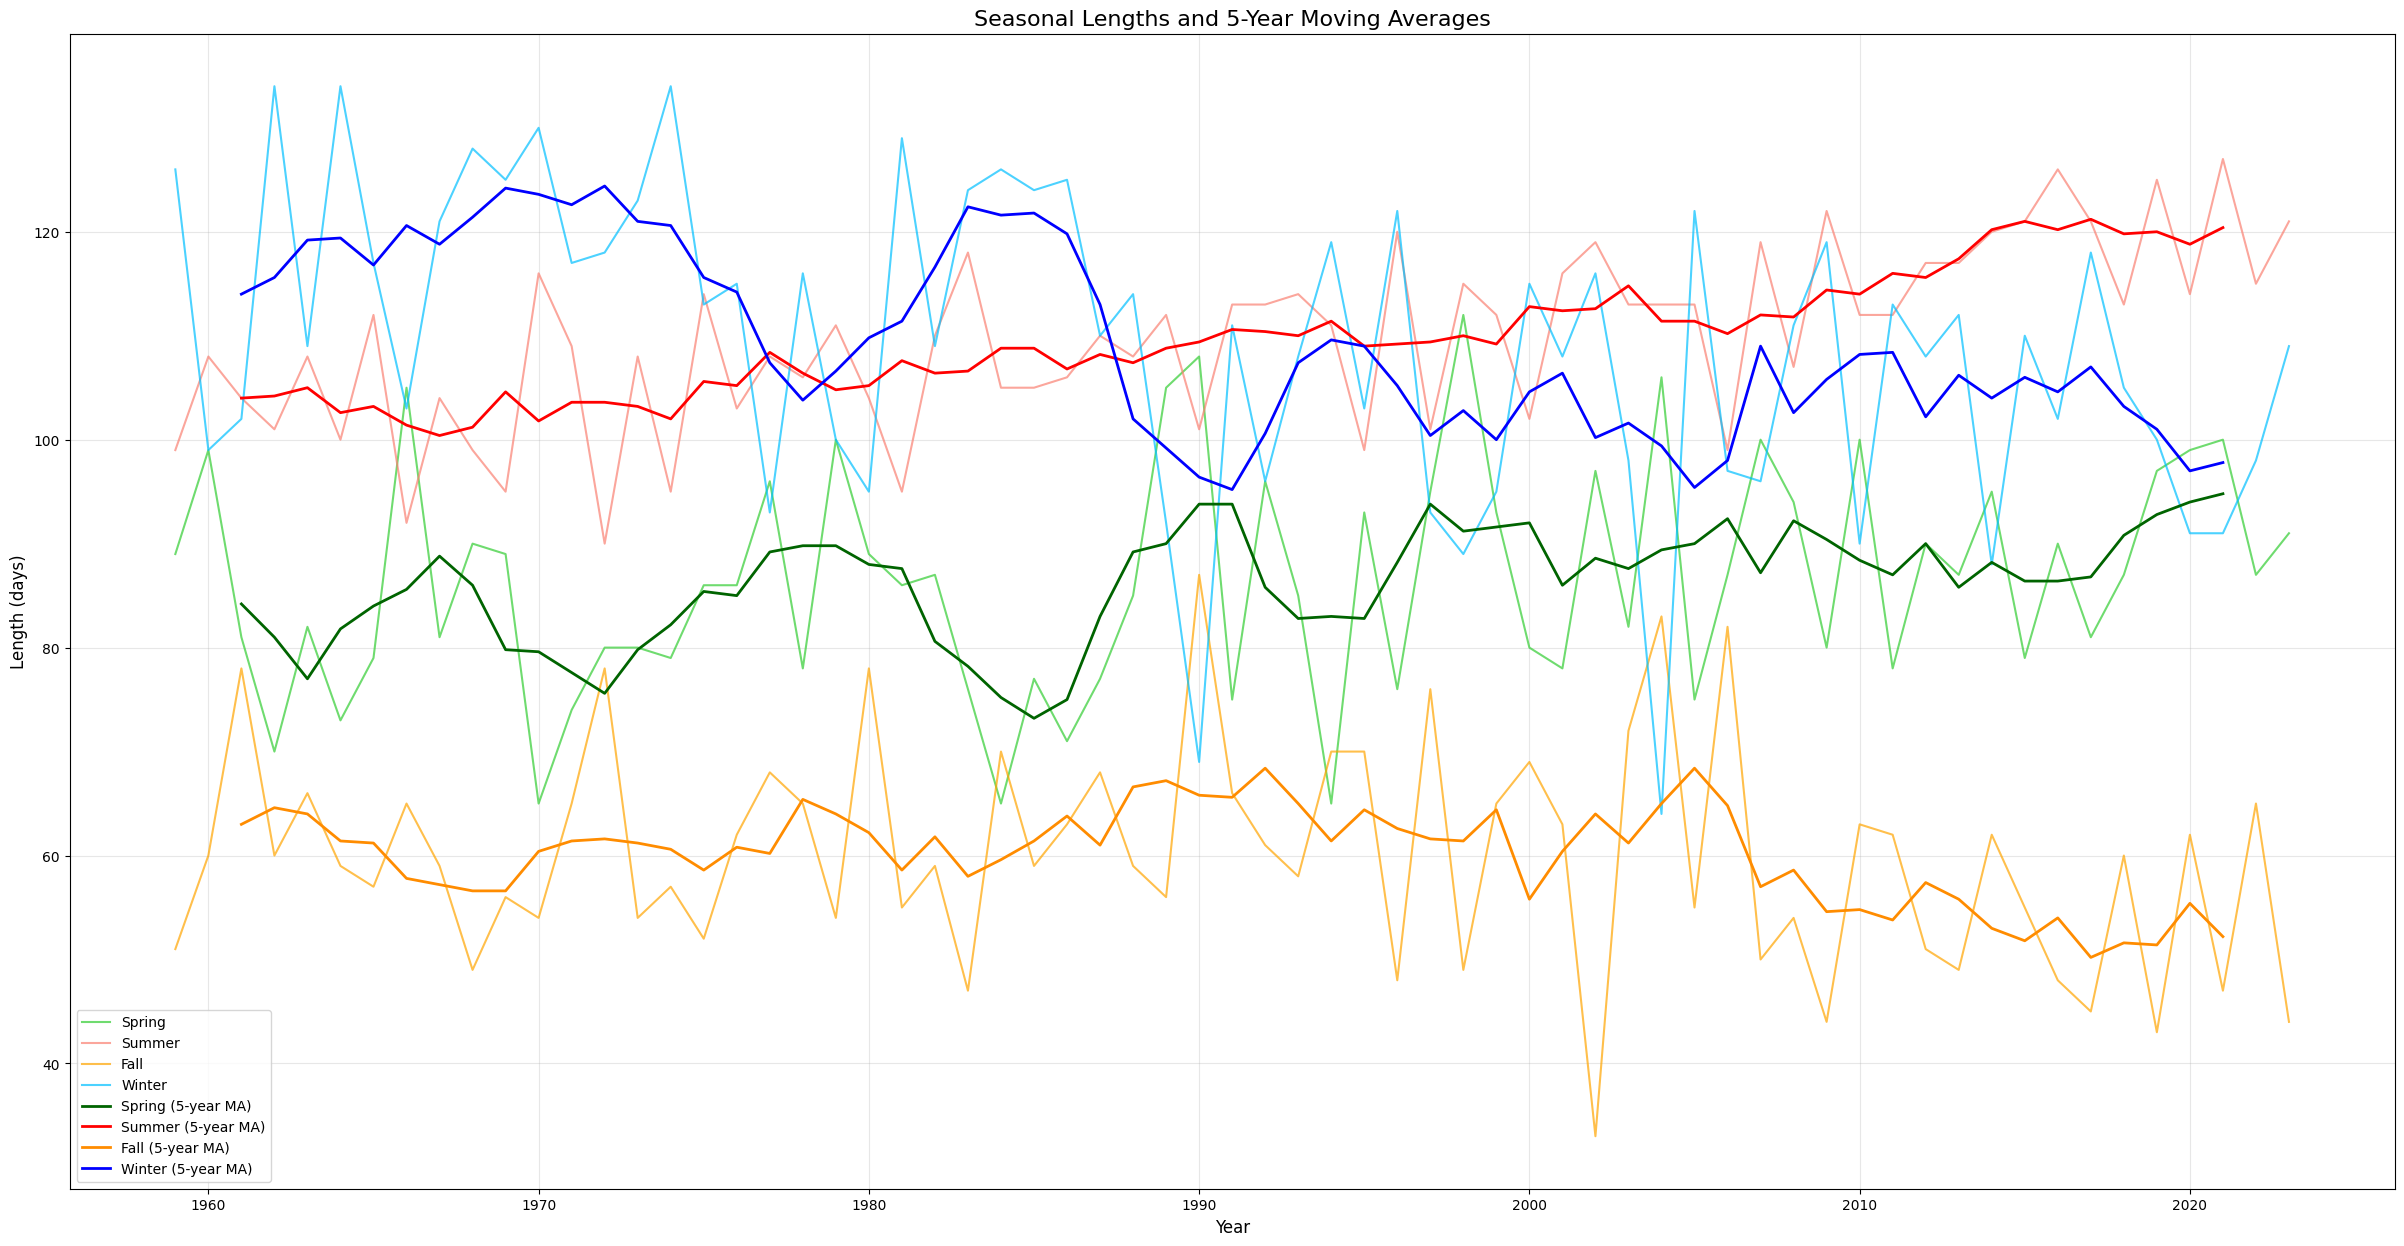

In [23]:
def moving_average(data, window):
    return np.convolve(data, np.ones(window), 'valid') / window

window_size = 5  # 5-year moving average

spring_series = pd.Series(spring_length)
summer_series = pd.Series(summer_length)
fall_series = pd.Series(fall_length)
winter_series = pd.Series(winter_length)

# Calculate moving averages
spring_ma = spring_series.rolling(window=window_size, center=True).mean()
summer_ma = summer_series.rolling(window=window_size, center=True).mean()
fall_ma = fall_series.rolling(window=window_size, center=True).mean()
winter_ma = winter_series.rolling(window=window_size, center=True).mean()

# Adjust x-axis for moving averages (centering)

plt.figure(figsize=(30, 15))

# Plot original data
plt.plot(year_list, spring_length, label='Spring', color='limegreen', alpha=0.7)
plt.plot(year_list, summer_length, label='Summer', color='salmon', alpha=0.7)
plt.plot(year_list, fall_length, label='Fall', color='orange', alpha=0.7)
plt.plot(year_list, winter_length, label='Winter', color='deepskyblue', alpha=0.7)

# Plot moving averages
plt.plot(year_list, spring_ma, label='Spring (5-year MA)', color='darkgreen', linewidth=2)
plt.plot(year_list, summer_ma, label='Summer (5-year MA)', color='red', linewidth=2)
plt.plot(year_list, fall_ma, label='Fall (5-year MA)', color='darkorange', linewidth=2)
plt.plot(year_list, winter_ma, label='Winter (5-year MA)', color='blue', linewidth=2)

plt.title('Seasonal Lengths and 5-Year Moving Averages', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Length (days)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.show()

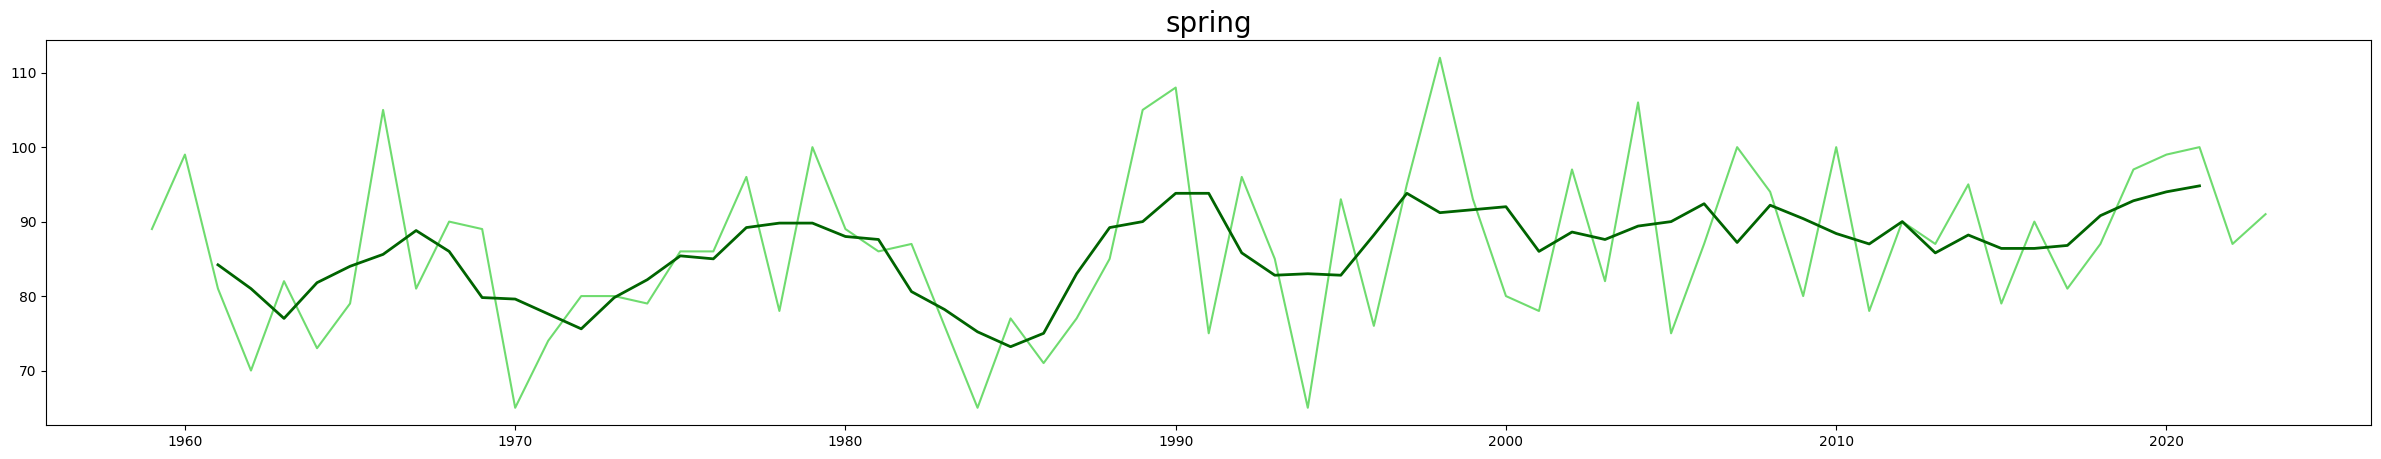

In [24]:
plt.figure(figsize=(30,5))
plt.title('spring', fontsize=20)
plt.plot(year_list, spring_length, label='Spring', color='limegreen', alpha=0.7)
plt.plot(year_list, spring_ma, label='Spring (5-year MA)', color='darkgreen', linewidth=2)
plt.show()

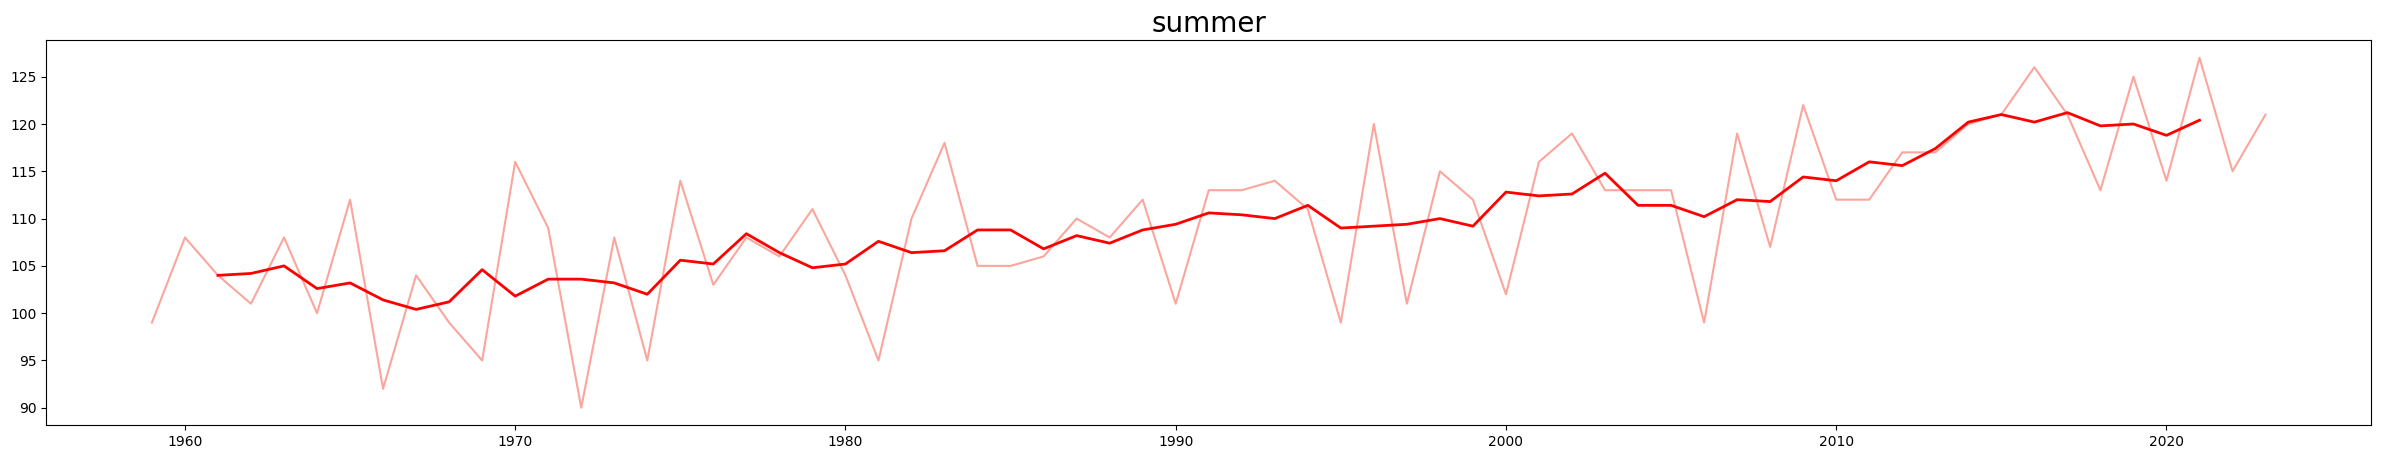

In [25]:
plt.figure(figsize=(30,5))
plt.title('summer', fontsize=20)
plt.plot(year_list, summer_length, label='Summer', color='salmon', alpha=0.7)
plt.plot(year_list, summer_ma, label='Summer (5-year MA)', color='red', linewidth=2)
plt.show()

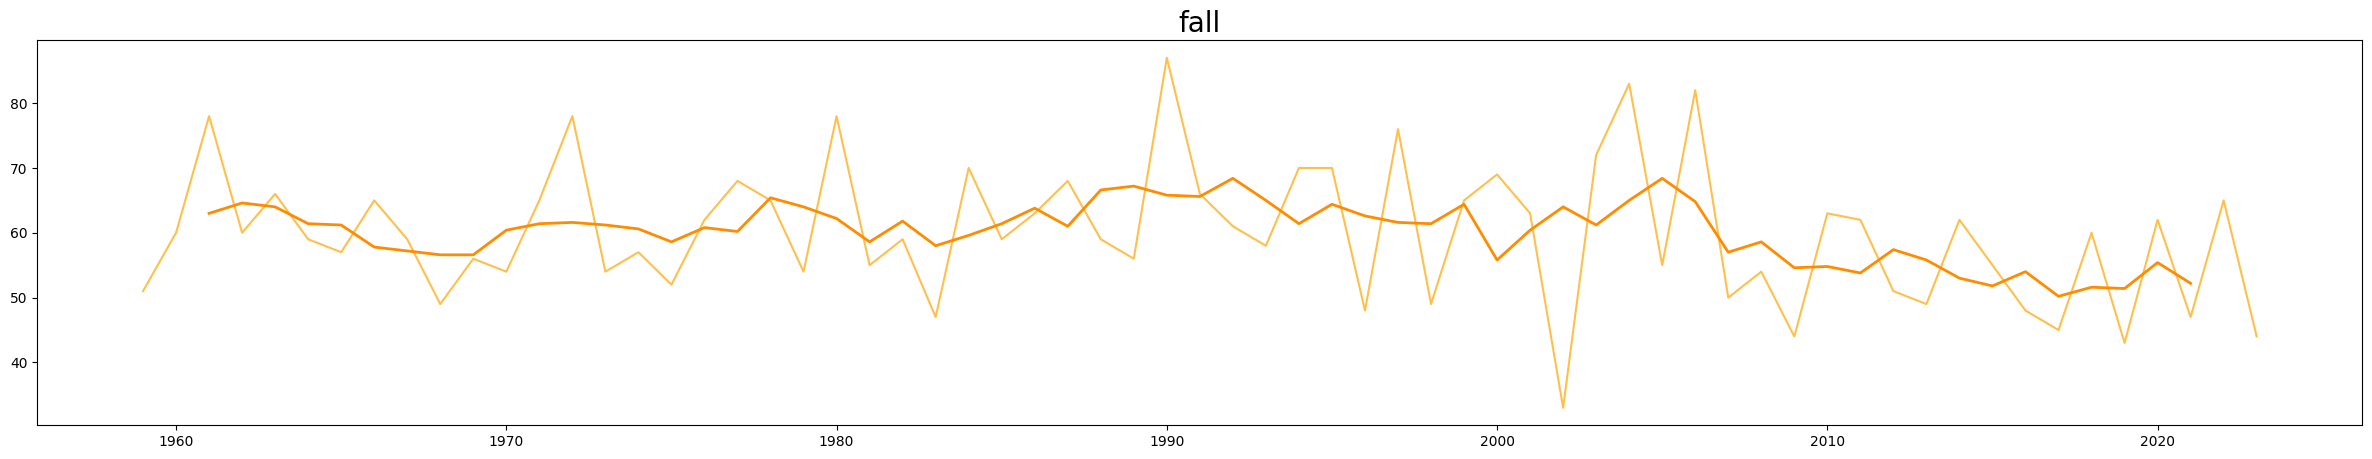

In [26]:
plt.figure(figsize=(30,5))
plt.title('fall', fontsize=20)
plt.plot(year_list, fall_length, label='Fall', color='orange', alpha=0.7)
plt.plot(year_list, fall_ma, label='Fall (5-year MA)', color='darkorange', linewidth=2)
plt.show()

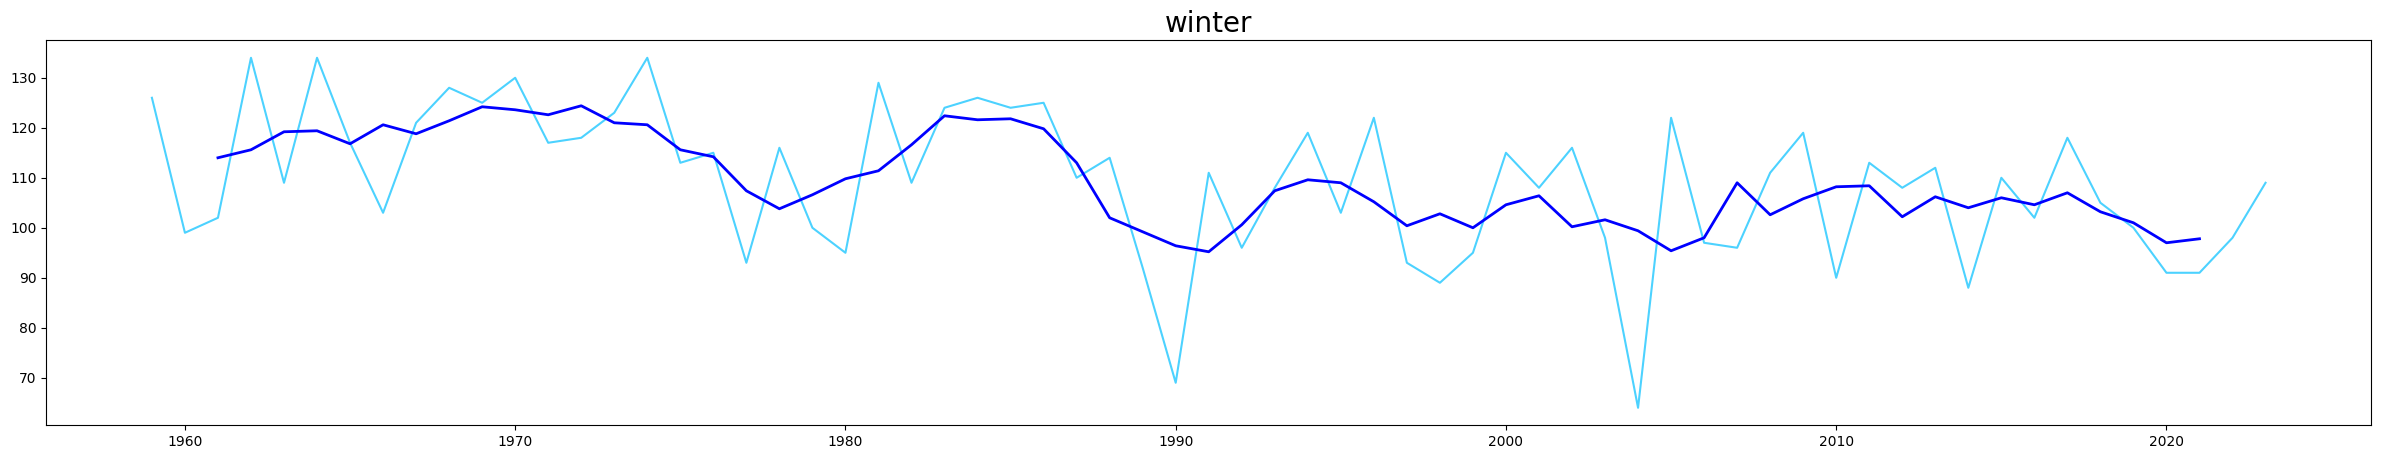

In [27]:
plt.figure(figsize=(30,5))
plt.title('winter', fontsize=20)
plt.plot(year_list, winter_length, label='Winter', color='deepskyblue', alpha=0.7)
plt.plot(year_list, winter_ma, label='Winter (5-year MA)', color='blue', linewidth=2)
plt.show()

#### 2-5. 사계절 데이터프레임 저장

In [28]:
season = pd.DataFrame(
    {
    'year': year_list,
    'spring': spring_length,
    'summer': summer_length,
    'fall': fall_length,
    'winter': winter_length,
    }
)

In [29]:
season.to_csv('./DB/4-season_2.csv')

In [30]:
check = pd.read_csv('./DB/4-season_2.csv')
check = check[check['year'] >= 1959].reset_index()
check.drop('index', axis=1, inplace=True)
check.drop('Unnamed: 0', axis=1, inplace=True)
check

,year,spring,summer,fall,winter
0,1959,89,99,51,126
1,1960,99,108,60,99
2,1961,81,104,78,102
3,1962,70,101,60,134
4,1963,82,108,66,109
...,...,...,...,...,...
60,2019,97,125,43,100
61,2020,99,114,62,91
62,2021,100,127,47,91
63,2022,87,115,65,98
